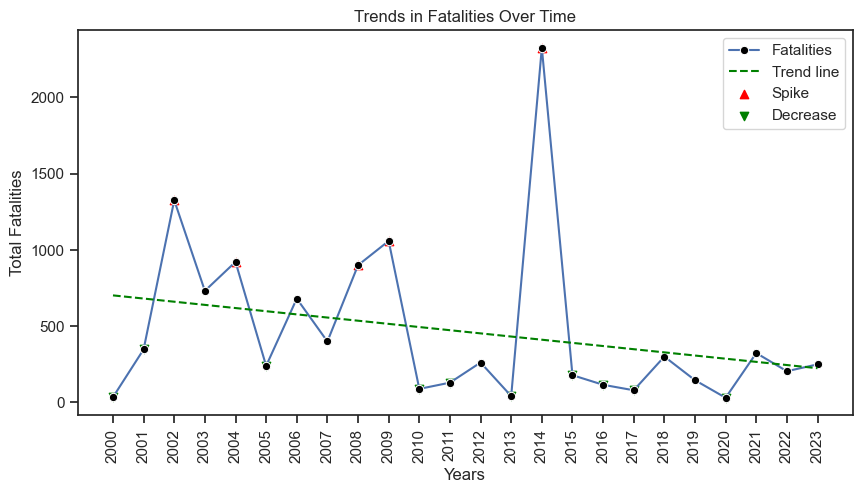

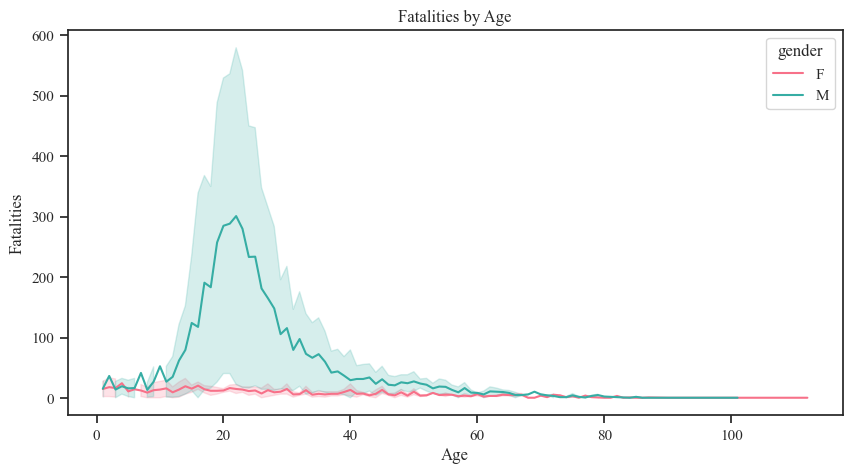

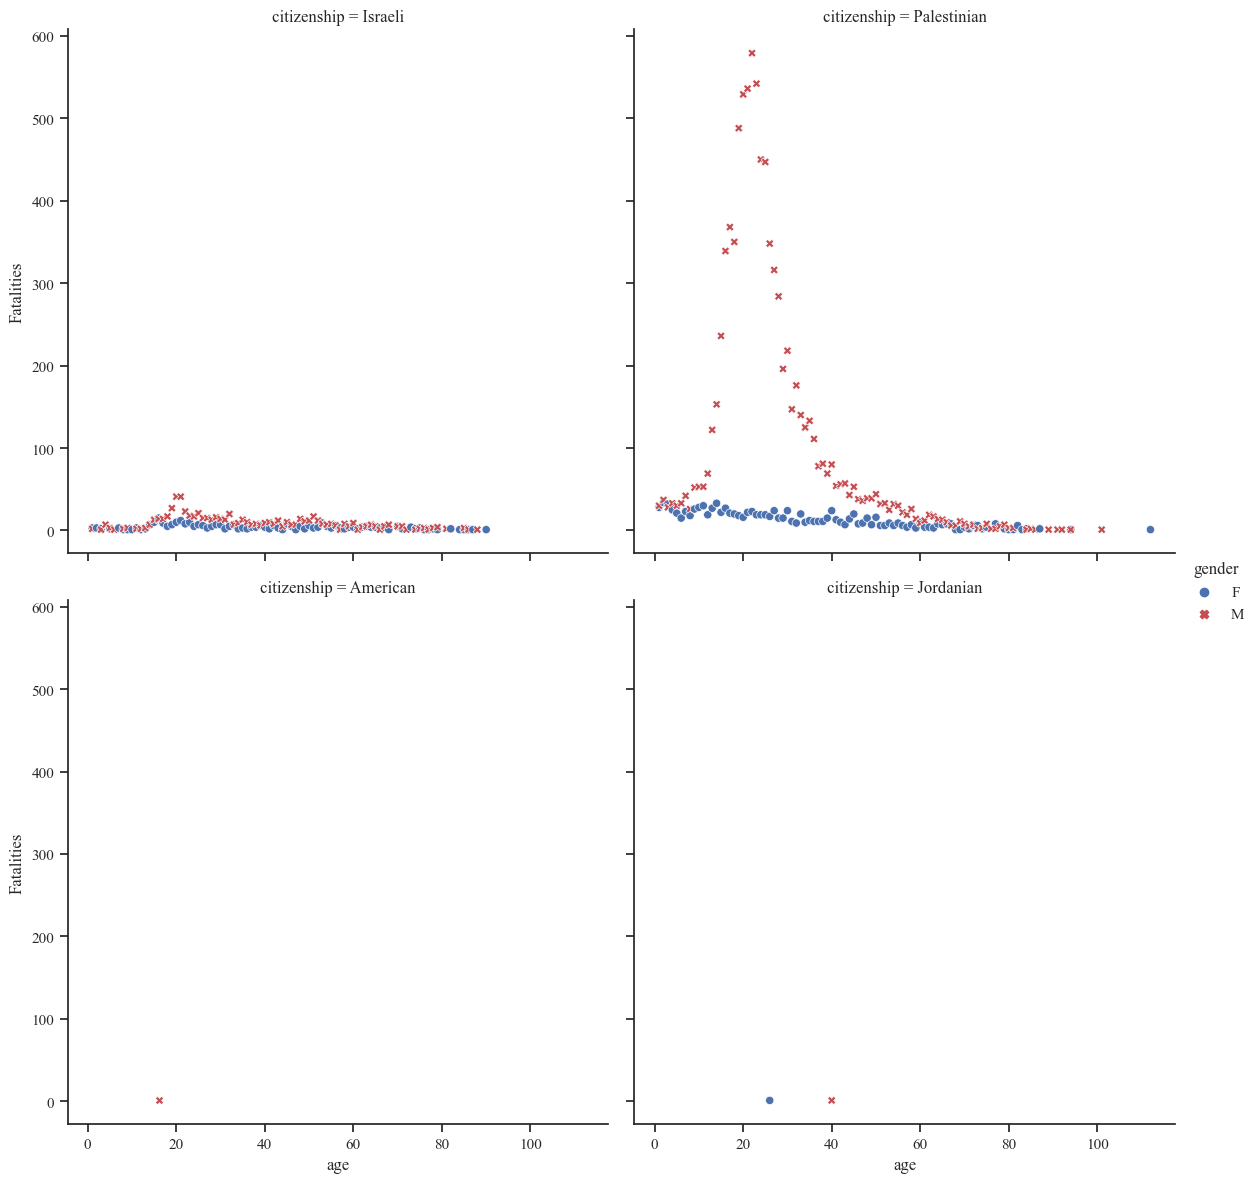

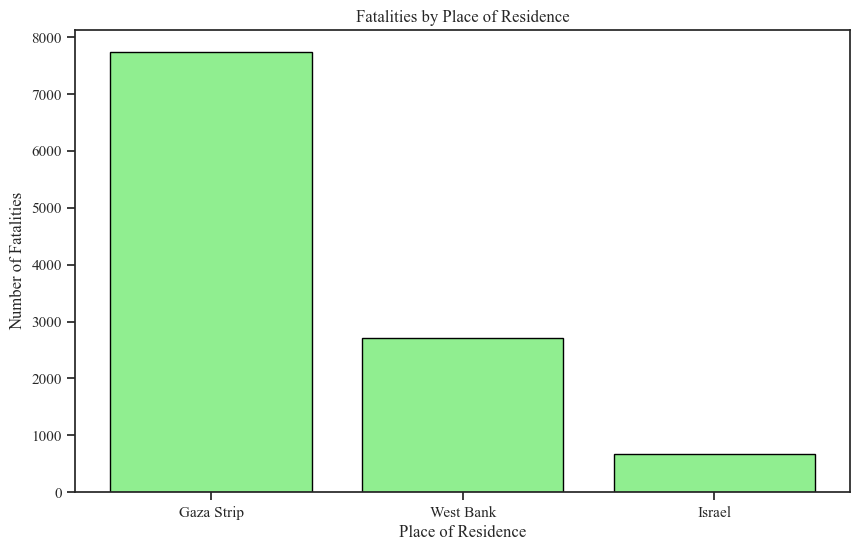

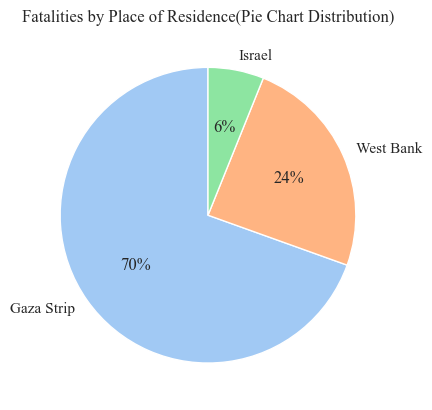

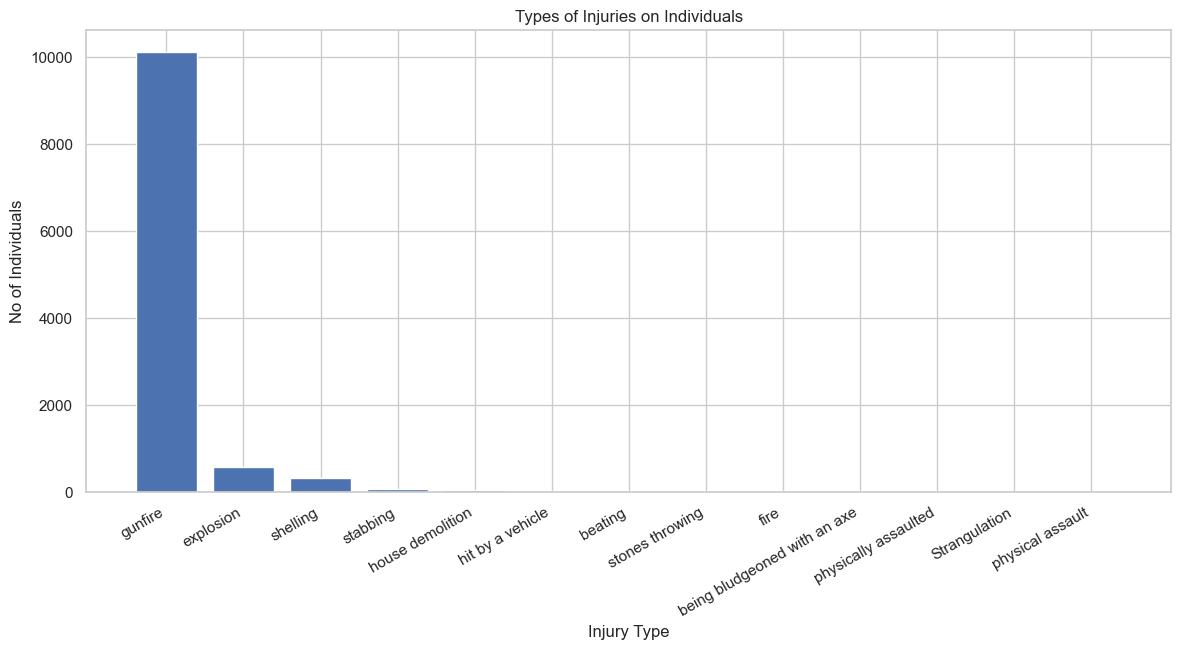

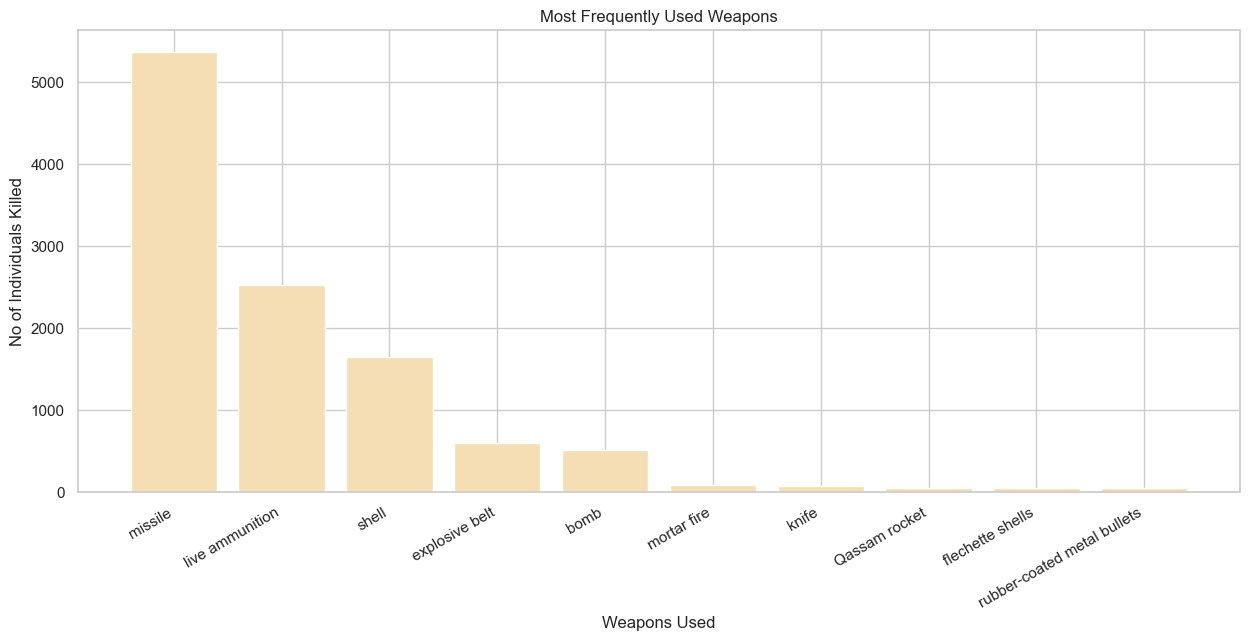

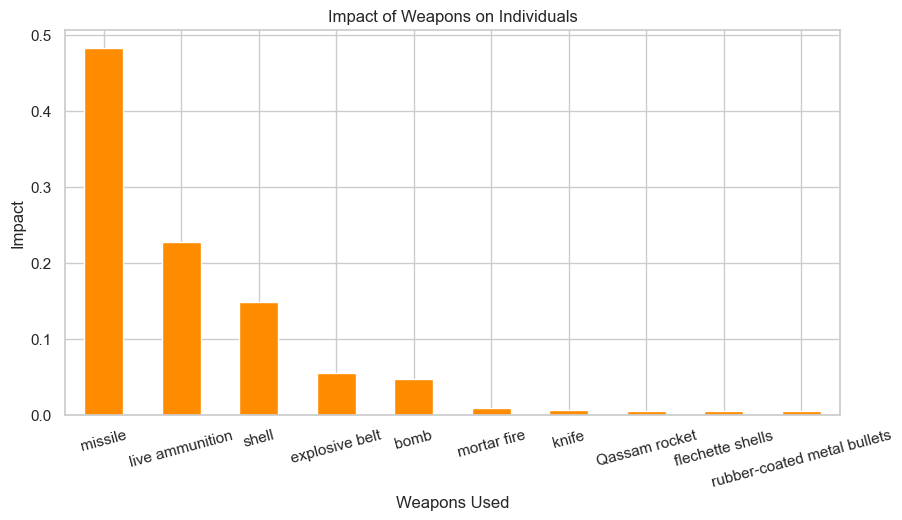

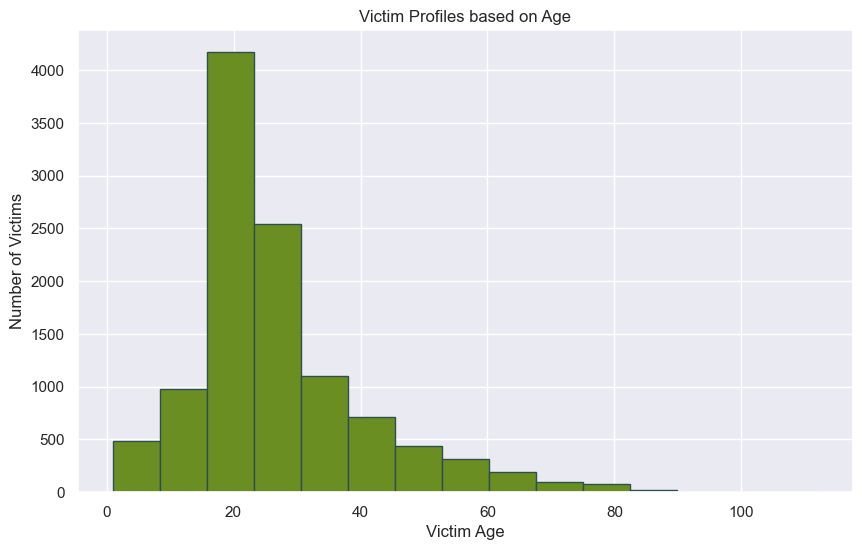

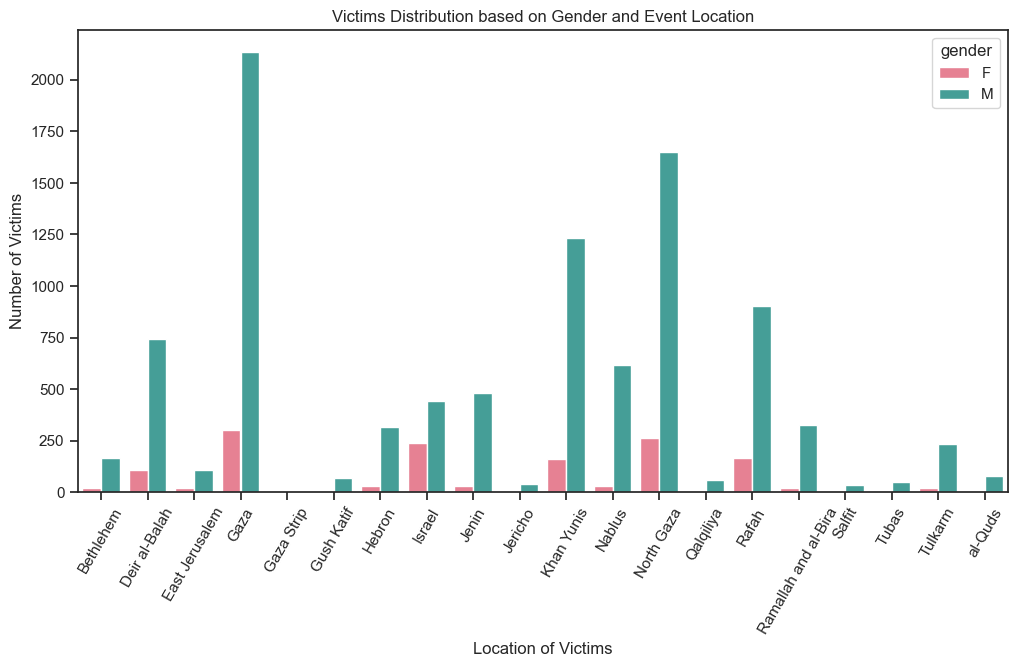

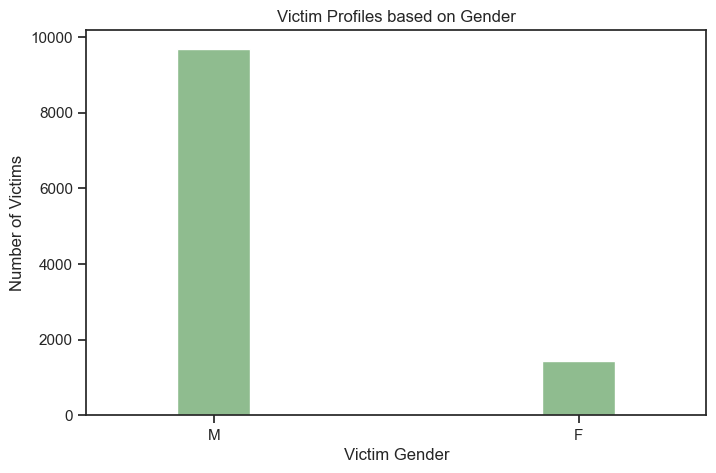

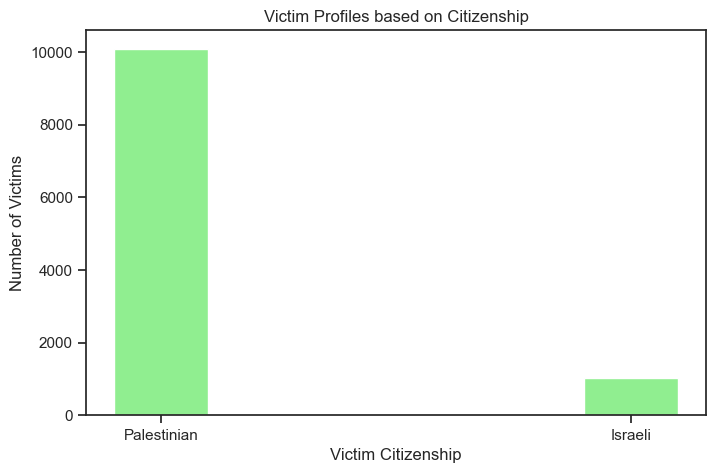

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ft = pd.read_csv("fatalities.csv") #importing data

#Cleaning Data
ft["age"].fillna(method="ffill", inplace=True)
ft["gender"].fillna(method="ffill", inplace=True)
ft["took_part_in_the_hostilities"].fillna("Unknown",inplace=True)
ft["place_of_residence"].fillna(method="ffill", inplace=True)
ft["place_of_residence_district"].fillna(method="ffill", inplace=True)
ft["type_of_injury"].fillna(method="ffill", inplace=True)
ft["ammunition"].fillna(method="ffill", inplace=True)
ft["notes"].fillna("Unknown", inplace=True)
#print(ft.isnull().sum())
#Sorting Data
ft["date_of_death"] = pd.to_datetime(ft["date_of_death"])
ft = ft.sort_values(by="date_of_death")


                    #TASK 1
ft['date_of_event'] = pd.to_datetime(ft['date_of_event'])
groupdt = ft.groupby(ft['date_of_death'].dt.to_period("Y"))  
data = groupdt.size().reset_index(name='fatalities') 
x = np.arange(len(data))
y = data['fatalities'].values
coefficients = np.polyfit(x, y, 1)
trends = np.polyval(coefficients, x)
rsd = y - trends
thresh = 200  
spikes = np.where(rsd > thresh)[0]
declines = np.where(rsd < -thresh)[0]

plt.figure(figsize=(10, 5))
sns.lineplot(x =data['date_of_death'].astype(str), y =data['fatalities'], data=data, marker='o', markerfacecolor='black', label='Fatalities')
sns.lineplot(x = data['date_of_death'].astype(str), y=trends, linestyle='--', color='green', label='Trend line')
plt.scatter(data['date_of_death'].iloc[spikes].astype(str), data['fatalities'].iloc[spikes], marker='^', color='red', label='Spike')
plt.scatter(data['date_of_death'].iloc[declines].astype(str), data['fatalities'].iloc[declines], marker='v', color='green', label='Decrease')
plt.title('Trends in Fatalities Over Time')
plt.xlabel('Years')
plt.ylabel('Total Fatalities')
plt.xticks(rotation=90)
plt.legend()
plt.show()


                #TASK 2
analysis = ft[['age', 'gender', 'citizenship']].describe()
age = ft['age'].value_counts().reset_index()
age.columns = ['age', 'count']
gender = ft['gender'].value_counts().reset_index()
gender.columns = ['gender', 'count']
citizenship = ft['citizenship'].value_counts().reset_index()
citizenship.columns = ['citizenship', 'count']
deaths = ft.groupby(['age', 'gender', 'citizenship']).size().reset_index(name='Fatalities')
sns.set_theme(style="ticks")

plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.style'] = 'normal'

plt.figure(figsize=(10,5))
plt.xlabel('Age')
plt.ylabel('Fatalities')
plt.title('Fatalities by Age')
sns.lineplot(data=ft, x=deaths['age'], y=deaths['Fatalities'],hue=deaths['gender'],palette="husl")  
sns.relplot(data=ft, x=deaths['age'], y=deaths['Fatalities'], col=deaths['citizenship'], hue=deaths['gender'], style=deaths['gender'],
            col_wrap=2, palette=["b", "r"], sizes=(10, 100),height=6, aspect=1,kind="scatter",   )



                #TASK 3
violenceregions = ft['event_location_region'].value_counts().head(10)   
plt.figure(figsize=(10, 6))
#bar chart
barchart = plt.bar(violenceregions.index, violenceregions, color='lightgreen', edgecolor='black')
plt.title('Fatalities by Place of Residence')
plt.xlabel('Place of Residence')
plt.ylabel('Number of Fatalities')
plt.xticks(rotation=0, ha='center')
plt.show()
#pie chart
colors=sns.color_palette('pastel')[0:3]
plt.pie(violenceregions, labels=violenceregions.index, startangle=90, autopct='%.0f%%', colors=colors)
plt.title('Fatalities by Place of Residence(Pie Chart Distribution)')
plt.xticks(rotation=0, ha='center')
plt.show()


                #TASK 4
injuries = ft['type_of_injury'].value_counts().head(13)
plt.figure(figsize=(14,6))
sns.set_theme(style="whitegrid")
plt.bar(injuries.index, injuries.values)
plt.title('Types of Injuries on Individuals')
plt.xlabel('Injury Type')
plt.ylabel('No of Individuals')
plt.xticks(rotation=30, ha='right')
plt.show()


                #TASK 5
weapons = ft['ammunition'].value_counts().head(10)
plt.figure(figsize=(15,6))
plt.bar(weapons.index, weapons.values, color='wheat')
plt.title('Most Frequently Used Weapons')
plt.xlabel('Weapons Used')
plt.ylabel('No of Individuals Killed')
plt.xticks(rotation=30, ha='right')
plt.show()
#calculate impact
weaponsimpact = weapons/len(ft)
plt.figure(figsize=(10,5))
weaponsimpact.plot(kind='bar', color='darkorange')
plt.title('Impact of Weapons on Individuals')
plt.xlabel('Weapons Used')
plt.ylabel('Impact')
plt.xticks(rotation=15, ha='center')
plt.show()



            #TASK 6
#Age distribution
plt.figure(figsize=(10,6))
sns.set_theme(style='darkgrid')
plt.hist(ft['age'].dropna(), bins=15, color= 'olivedrab', edgecolor='darkslategray')
plt.title('Victim Profiles based on Age')
plt.xlabel('Victim Age')
plt.ylabel('Number of Victims')
plt.xticks(rotation=0, ha='center')
plt.show()
#profiles based on age, gender and event location 
victimprofiles = ft.groupby(['event_location_district', 'gender']).size().reset_index(name='victims')
plt.figure(figsize=(12,6))
sns.set_theme(style='ticks')
sns.barplot(x='event_location_district', y='victims', hue=victimprofiles['gender'], data=victimprofiles, palette='husl')
plt.title('Victims Distribution based on Gender and Event Location')
plt.xlabel('Location of Victims')
plt.ylabel('Number of Victims')
plt.xticks(rotation=60, ha='center')
plt.show()
#Gender distribution
plt.figure(figsize=(8,5))
sns.set_theme(style='ticks')
genderdistt = ft['gender'].value_counts()
genderdistt.plot(kind='bar', color='darkseagreen', width=0.2)
plt.title('Victim Profiles based on Gender')
plt.xlabel('Victim Gender')
plt.ylabel('Number of Victims')
plt.xticks(rotation=0, ha='center')
plt.show()
#Citizenship Distribution
sns.set_theme(style='ticks')
plt.figure(figsize=(8,5))
citizendistt = ft['citizenship'].value_counts().head(2)
plt.bar(citizendistt.index, citizendistt.values, color='lightgreen', width=0.2)
plt.title('Victim Profiles based on Citizenship')
plt.xlabel('Victim Citizenship')
plt.ylabel('Number of Victims')
plt.xticks(rotation=0, ha='center')
plt.show()

